**Лабораторная работа №2**

Студент: Пешков М.Ю. Группа: М8О-109М-23

**Глобальная оптимизация и метаэвристические алгоритмы**

Задание:

*   В pygmo запрограммировть 2-е тестовые функции
*   Найти оптимум функций с помощью 3-ех разных алгоритмов, доступных в библиотеке
*   Получить таблицу сравнения





Установка pygmo

In [ ]:
!pip install pygmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 42.5 MB/s eta 0:00:00


Подключение необходимых библиотек

In [ ]:
import math
import pygmo as pg
import numpy as np
from matplotlib import pyplot as pyplot
from matplotlib import rc
from matplotlib import colors as cm
from matplotlib import pyplot as plt
from numpy import linalg as la
import autograd
import math
import random


Определение функции оптимизации и вывода графика поколений

In [ ]:
def draw_optimization(prob, alg, population_size = 100, gen_number = 25):

  population = pg.population(prob, population_size)
  # Определяем список для получения полной популяции
  individuals_list = []
  # Определяем список для получения соответствующих значений пригодности
  fitness_list = []

  for i in range(gen_number):
    population = alg.evolve(population)
    fitness_list.append(population.get_f()[population.best_idx()])
    individuals_list.append(population.get_x()[population.best_idx()])

  gens = np.linspace(0, gen_number, gen_number)
  fitness_list = np.array(fitness_list)

  fig = plt.figure(figsize = (10, 5))
  ax = plt.axes()
  ax.plot(gens, fitness_list, '-', marker = '.', label = "Результат чемпиона")
  ax.set_title(type(prob).__name__)
  ax.set_xlabel("Номер поколения")
  ax.set_ylabel("Значение функции")
  ax.legend()
  return individuals_list

**Тестовые функции**

**Функция Матьяса**

Визуализация функции Матьяса

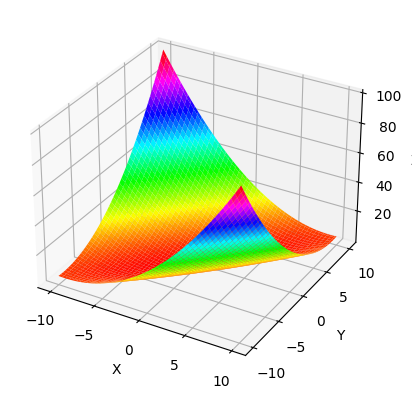

In [ ]:
def matyas(x, y):
    return 0.26 * (x**2 + y**2) - 0.48 * x * y

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z = matyas(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='hsv')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Зададим функцию Матьяса

In [ ]:
class Matyas:
    @staticmethod
    def fitness(x):
        return [0.26 * (x[0] ** 2 + x[1] ** 2) - 0.48 * x[1] * x[0]]

    @staticmethod
    def get_bounds():
        return np.array([[-10, -10], [10, 10]])

    @staticmethod
    def get_min():
        return np.array([0., 0., 0.])

In [ ]:
print(pg.problem(Matyas()))

Problem name: <class '__main__.Matyas'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



**Simple Genetic Algorithm (SGA)**

In [ ]:
prob = pg.problem(Matyas())
algo = pg.algorithm(pg.sga(gen=100))

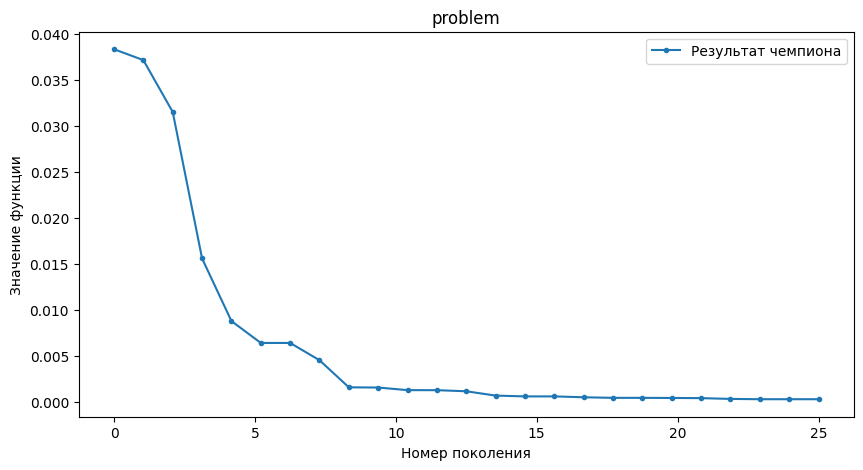

In [ ]:
fitness_list = draw_optimization(prob, algo)

**Extended Ant Colony Optimisation (GACO)**

In [ ]:
prob = pg.problem(Matyas())
algo = pg.algorithm(pg.gaco(gen=100))

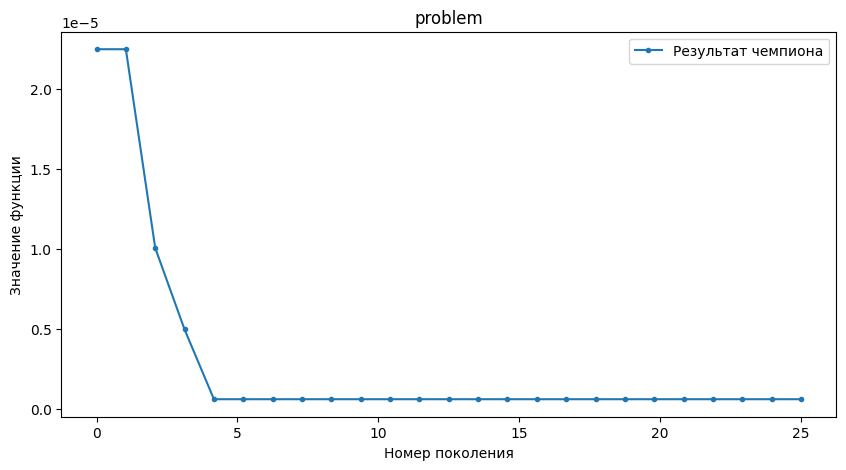

In [ ]:
fitness_list = draw_optimization(prob, algo)

**Artifical Bee Colony (ABC)**

In [ ]:
prob = pg.problem(Matyas())
algo = pg.algorithm(pg.bee_colony(gen=1000))

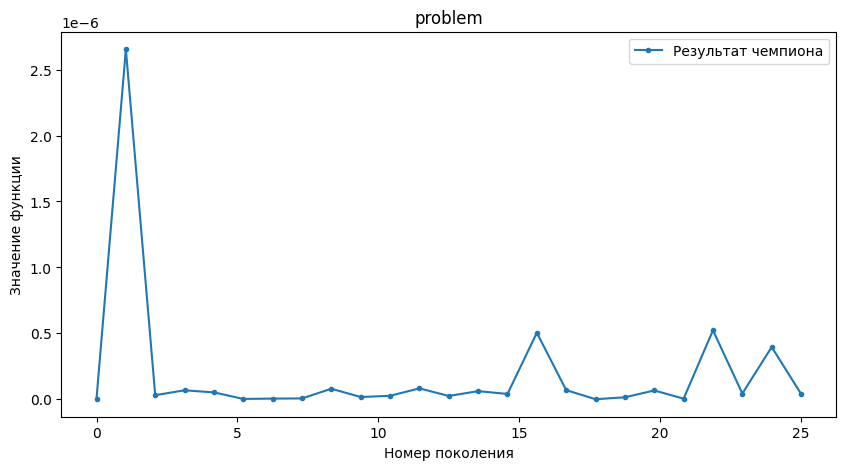

In [ ]:
fitness_list = draw_optimization(prob, algo)

**Сравнение генетических алгоритмов:**

In [ ]:
matyas_p = pg.problem(Matyas())
matyas_global_min_x = 0
matyas_global_min_y = 0

matyas_pop_sga = pg.population(matyas_p, size = 100)
matyas_pop_gaco = pg.population(matyas_p, size = 100)
matyas_pop_bee_colony = pg.population(matyas_p, size = 100)

sga = pg.algorithm(pg.sga(25))
gaco = pg.algorithm(pg.gaco(25))
bee_colony = pg.algorithm(pg.bee_colony(25))

matyas_pop_sga = sga.evolve(matyas_pop_sga)
matyas_pop_gaco = gaco.evolve(matyas_pop_gaco)
matyas_pop_bee_colony = bee_colony.evolve(matyas_pop_bee_colony)

best_fitness_sga = matyas_pop_sga.get_f()[matyas_pop_sga.best_idx()]
best_fitness_gaco = matyas_pop_gaco.get_f()[matyas_pop_gaco.best_idx()]
best_fitness_bee_colony = matyas_pop_bee_colony.get_f()[matyas_pop_bee_colony.best_idx()]

print('Matyas function')
print("-" * 25)
print(f'generation number: 25')
print(f'SGA solution x: {matyas_pop_sga.get_x()[matyas_pop_sga.best_idx()]}')
print(f'SGA solution value: {best_fitness_sga}')
print(f'ERROR: {np.linalg.norm(np.array([matyas_global_min_x, matyas_global_min_y]) - np.array(matyas_pop_sga.get_x()[matyas_pop_sga.best_idx()]))}')
print("-" * 25)
print(f'GACO solution x: {matyas_pop_gaco.get_x()[matyas_pop_gaco.best_idx()]}')
print(f'GACO solution value: {best_fitness_gaco}')
print(f'ERROR: {np.linalg.norm(np.array([matyas_global_min_x, matyas_global_min_y]) - np.array(matyas_pop_gaco.get_x()[matyas_pop_gaco.best_idx()]))}')
print("-" * 25)
print(f'BEE_COLONY solution x: {matyas_pop_bee_colony.get_x()[matyas_pop_bee_colony.best_idx()]}')
print(f'BEE_COLONY solution value: {best_fitness_bee_colony}')
print(f'ERROR: {np.linalg.norm(np.array([matyas_global_min_x, matyas_global_min_y]) - np.array(matyas_pop_bee_colony.get_x()[matyas_pop_bee_colony.best_idx()]))}')

Matyas function
-------------------------
generation number: 100
SGA solution x: [1.13969614 1.27247581]
SGA solution value: [0.06259335]
ERROR: 1.70824529694379
-------------------------
GACO solution x: [-0.03863528 -0.05932965]
GACO solution value: [0.00020304]
ERROR: 0.07080036583101196
-------------------------
BEE_COLONY solution x: [-0.01301788  0.00040282]
BEE_COLONY solution value: [4.6620187e-05]
ERROR: 0.013024112851034926


**Функция Растригина**

Визуализация функции Растригина

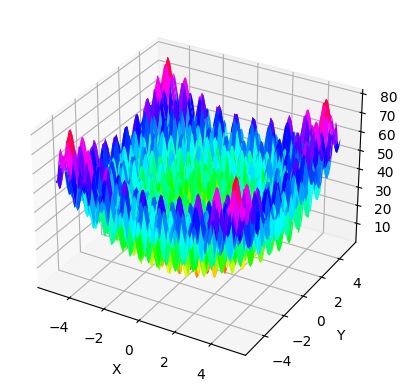

In [ ]:

def rastrigin(x, y):
    return 20 + x**2 - 10 * np.cos(2 * np.pi * x) + y**2 - 10 * np.cos(2 * np.pi * y)

x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)

X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='hsv')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [ ]:
print(pg.problem(pg.rastrigin(dim=2)))

Problem name: Rastrigin Function
	C++ class name: pagmo::rastrigin

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5.12, -5.12]
	Upper bounds: [5.12, 5.12]
	Has batch fitness evaluation: false

	Has gradient: true
	User implemented gradient sparsity: false
	Expected gradients: 2
	Has hessians: true
	User implemented hessians sparsity: true
	Expected hessian components: [2]

	Fitness evaluations: 0
	Gradient evaluations: 0
	Hessians evaluations: 0

	Thread safety: basic



**Simple Genetic Algorithm (SGA)**

In [ ]:
prob = pg.problem(pg.rastrigin(dim=2))
rastr_algo_1 = pg.algorithm(pg.sga(gen=100))

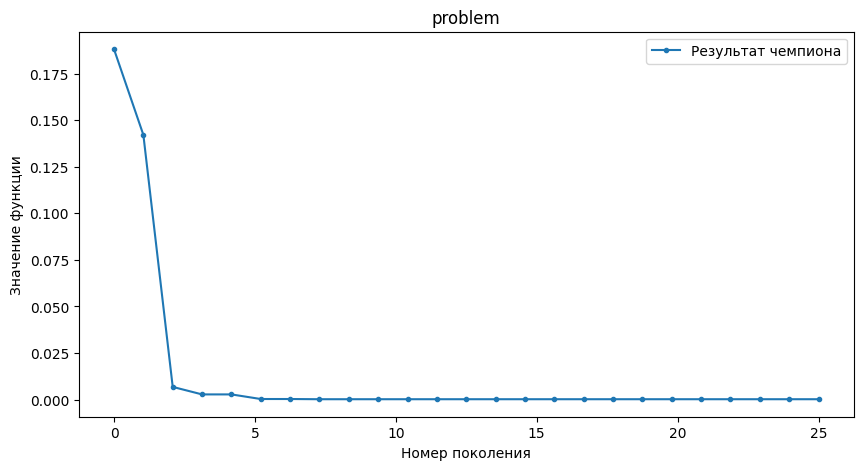

In [ ]:
fitness_list = draw_optimization(prob, rastr_algo_1)

**Extended Ant Colony Optimisation (GACO)**

In [ ]:
prob = pg.problem(pg.rastrigin(dim=2))
rastr_algo_2 = pg.algorithm(pg.gaco(gen=100))

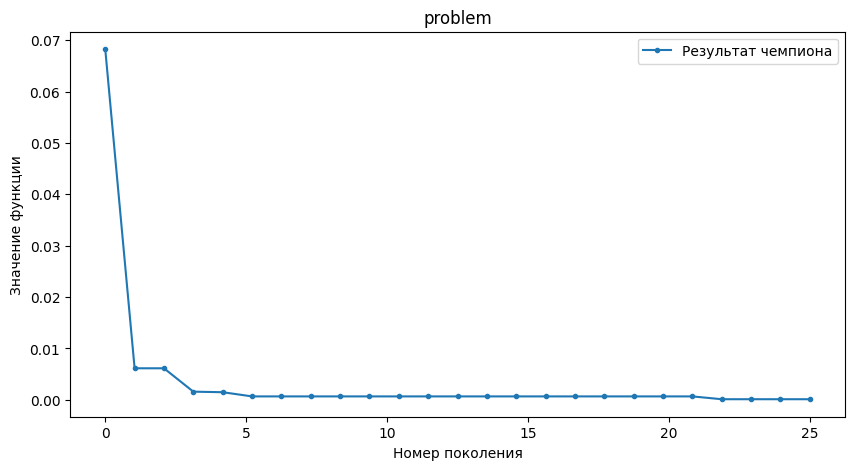

In [ ]:
fitness_list = draw_optimization(prob, rastr_algo_1)

**Artifical Bee Colony (ABC)**

In [ ]:
prob = pg.problem(pg.rastrigin(dim=2))
rastr_algo_2 = pg.algorithm(pg.gaco(gen=100))

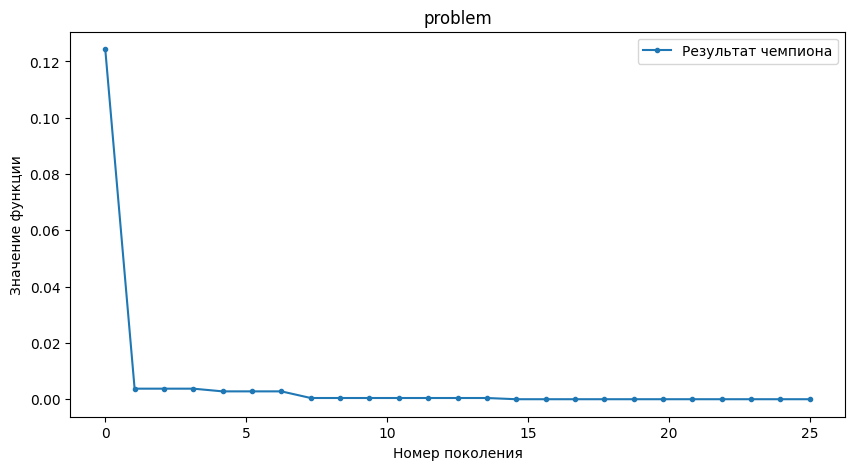

In [ ]:
fitness_list = draw_optimization(prob, rastr_algo_1)

**Сравнение генетических алгоритмов:**

In [ ]:
rastrigin_p = pg.problem(pg.rastrigin(dim=2))
rastrigin_global_min_x = 0
rastrigin_global_min_y = 0

rastrigin_pop_sga = pg.population(rastrigin_p, size = 100)
rastrigin_pop_gaco = pg.population(rastrigin_p, size = 100)
rastrigin_pop_bee_colony = pg.population(rastrigin_p, size = 100)

sga = pg.algorithm(pg.sga(25))
gaco = pg.algorithm(pg.gaco(25))
bee_colony = pg.algorithm(pg.bee_colony(25))

rastrigin_pop_sga = sga.evolve(rastrigin_pop_sga)
rastrigin_pop_gaco = gaco.evolve(rastrigin_pop_gaco)
rastrigin_pop_bee_colony = bee_colony.evolve(rastrigin_pop_bee_colony)

best_fitness_sga = rastrigin_pop_sga.get_f()[rastrigin_pop_sga.best_idx()]
best_fitness_gaco = rastrigin_pop_gaco.get_f()[rastrigin_pop_gaco.best_idx()]
best_fitness_bee_colony = rastrigin_pop_bee_colony.get_f()[rastrigin_pop_bee_colony.best_idx()]

print('Rastrigin function')
print("-" * 25)
print(f'generation number: 25')
print(f'SGA solution x: {rastrigin_pop_sga.get_x()[rastrigin_pop_sga.best_idx()]}')
print(f'SGA solution value: {best_fitness_sga}')
print(f'ERROR: {np.linalg.norm(np.array([rastrigin_global_min_x, rastrigin_global_min_y]) - np.array(rastrigin_pop_sga.get_x()[rastrigin_pop_sga.best_idx()]))}')
print("-" * 25)
print(f'GACO solution x: {rastrigin_pop_gaco.get_x()[rastrigin_pop_gaco.best_idx()]}')
print(f'GACO solution value: {best_fitness_gaco}')
print(f'ERROR: {np.linalg.norm(np.array([rastrigin_global_min_x, rastrigin_global_min_y]) - np.array(rastrigin_pop_gaco.get_x()[rastrigin_pop_gaco.best_idx()]))}')
print("-" * 25)
print(f'BEE_COLONY solution x: {rastrigin_pop_bee_colony.get_x()[rastrigin_pop_bee_colony.best_idx()]}')
print(f'BEE_COLONY solution value: {best_fitness_bee_colony}')
print(f'ERROR: {np.linalg.norm(np.array([rastrigin_global_min_x, rastrigin_global_min_y]) - np.array(rastrigin_pop_bee_colony.get_x()[rastrigin_pop_bee_colony.best_idx()]))}')

Rastrigin function
-------------------------
generation number: 25
SGA solution x: [0.04257733 0.00086071]
SGA solution value: [0.35766891]
ERROR: 0.0425860318443245
-------------------------
GACO solution x: [0.01385237 0.02299126]
GACO solution value: [0.14273351]
ERROR: 0.02684187180348594
-------------------------
BEE_COLONY solution x: [0.00045374 0.00068302]
BEE_COLONY solution value: [0.0001334]
ERROR: 0.0008199983664444909
